In [2]:
cd '/home/knight/matar/PYTHON/ECOGpy'

/home/knight/matar/PYTHON/ECOGpy


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import os
import numpy as np
import pandas as pd

from plotting.plot_singletrials import plot_singletrials
from utils.get_HGdata import get_HGdata
from ShadePlots.shadeplot_elec import calc_shadeplot, plot_shadeplot
from plotting.plot_brain import plot_clusters

import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist, squareform

## epoched HG data

In [6]:
#get data
subj, task = ('GP15','EmoGen')
var_list = ['srate','data_percent','active_elecs', 'RTs'] #vars of interest
srate, alldata, active_elecs, RTs = get_HGdata(subj, task, var_list, type = 'percent')

# variables:
#    alldata = HG data matrix - elecs x trials x time
#    srate = data sampling rate
#    active_elecs = electrode indices
#    RTs = reaction times (in srate)

## single trials

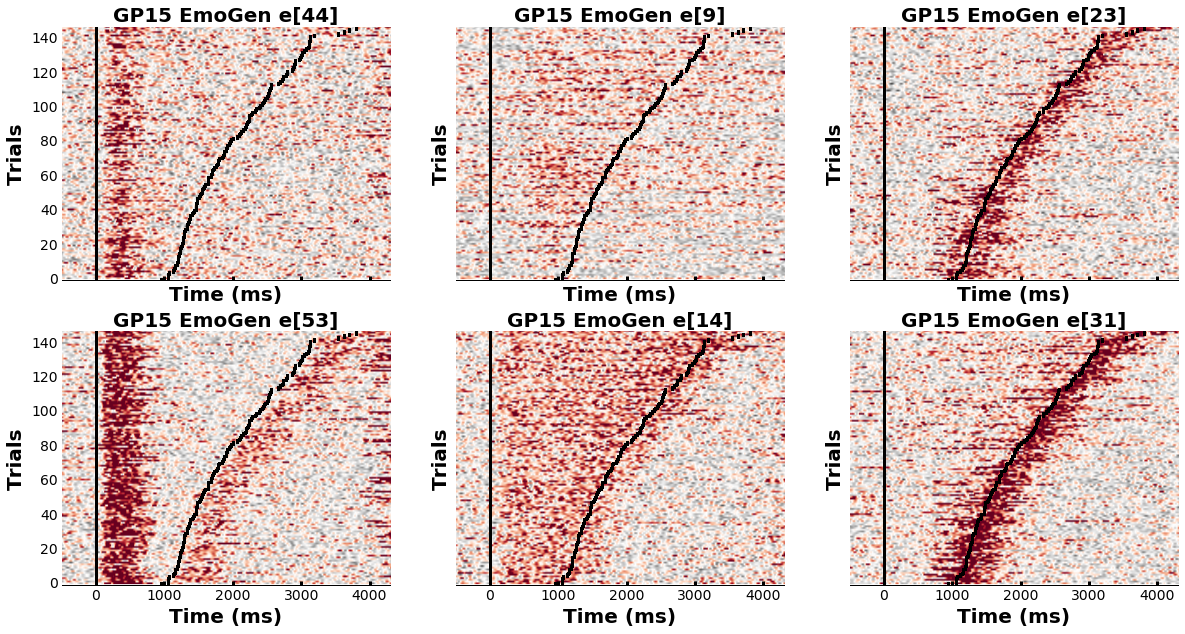

In [7]:
f, ax = plt.subplots(2, 3, sharey = True, sharex = True, figsize=(20,10))
ax = ax.flatten()

elecs = [44, 9, 23, 53, 14, 31] #some example elecs
for i, elec in enumerate(elecs):
    _ = plot_singletrials(subj, task, [elec], fig = f, ax = ax[i], cbar = False)


# mean trace with signficant activity

### calculate significant windows
1. ttest at every time point for baseline corrected data
2. fdr correct to get significant chunks of activity
3. keep only electrodes with at least 1 chunk >100ms that >10% baseline
4. if passes that threshold, mark all chunks that are >100ms

In [8]:
sig_windows, params = calc_shadeplot(subj, task, thresh = 10, chunk_size = 100, baseline = -500, merge_chunk_size = 0)

In [9]:
params

,bl_st,chunksize,merge_chunk_size,srate,thresh
0,-500.0,100.0,0.0,1000,10


In [10]:
sig_windows.head()

,subj,task,start_idx,end_idx,pthreshold
elec,,,,,
1,GP15,EmoGen,0.0,0.0,0.000000
5,GP15,EmoGen,982.0,1291.0,0.007642
9,GP15,EmoGen,641.0,1316.0,0.030887
10,GP15,EmoGen,663.0,2382.0,0.025600
12,GP15,EmoGen,420.0,972.0,0.013046


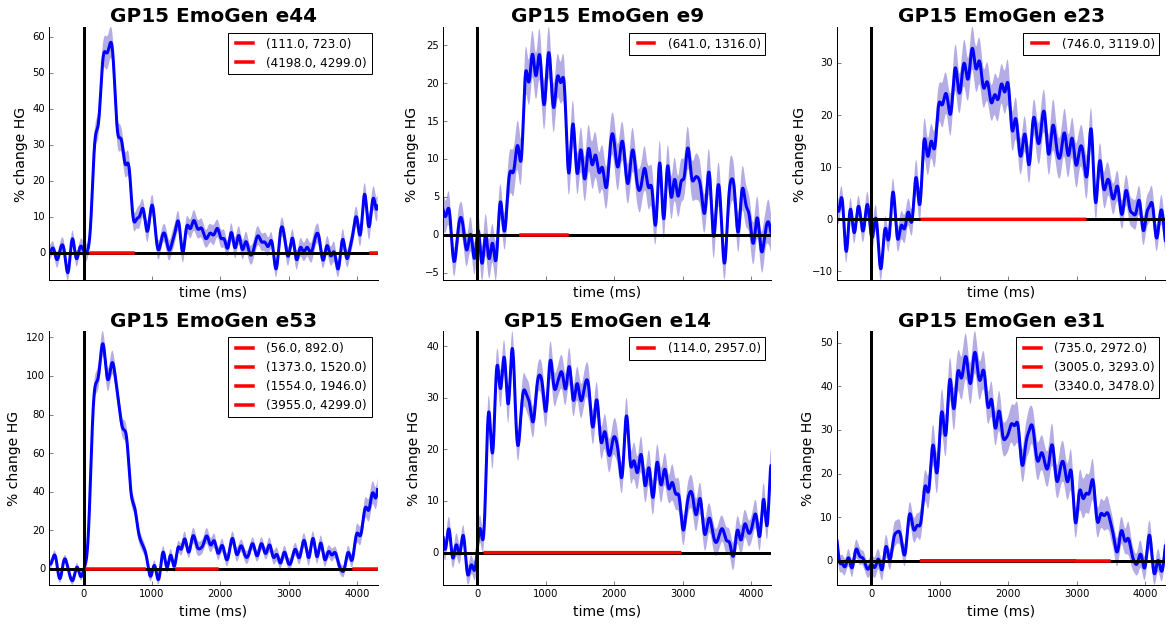

In [11]:
#plot mean traces with significance for sample electrodes
f, ax = plt.subplots(2, 3, sharey = False, sharex = True, figsize=(20,10))
ax = ax.flatten()

elecs = [44, 9, 23, 53, 14, 31] #some example elecs
for i, elec in enumerate(elecs):
    edata = alldata[active_elecs == elec,:,:].squeeze()
    a = plot_shadeplot(edata, sig_windows.ix[elec], params, ax = ax[i])
    a.set_title('{0} {1} e{2}'.format(subj, task, elec), fontsize = 20, weight = 'bold')